# **Clustering Tingkat Produksi Garam menggunkana KMeans**

### **Library yang digunakan**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## **Dataset**

In [43]:
df = pd.read_excel("data_produksi_garam.xlsx")
df.head()

,KABKOTA,2019,2020,2021,2022,2023,2024
0,ACEH BARAT DAYA,21.70,34.82,108.39,96.40,101.67,63.30
1,ACEH BESAR,800.16,8616.50,1016.32,503.48,490.36,1095.74
2,ACEH SELATAN,2.88,42.96,42.93,57.75,161.83,47.21
3,ACEH TIMUR,484.19,306.08,197.86,269.25,225.08,169.65
4,ACEH UTARA,1688.71,1523.45,1513.30,1822.34,1485.58,1023.56


### **Informasi Dasar Dataset**

In [44]:
print(f"Dimensi dataset: {df.shape}")
print(f"Jumlah kabupaten/kota: {df['KABKOTA'].nunique()}")
print(f"Kolom tahun: {[col for col in df.columns if col != 'KABKOTA']}")

Dimensi dataset: (84, 7)
Jumlah kabupaten/kota: 84
Kolom tahun: [2019, 2020, 2021, 2022, 2023, 2024]


### **Statistik Deskriptif**

In [45]:
print(df.describe())

                2019           2020           2021           2022  \
count      61.000000      64.000000      63.000000      67.000000   
mean    39793.891803   17910.209219   14477.666667    9490.523731   
std     82117.649069   40422.508931   32047.076799   23991.298729   
min         0.000000       0.000000       0.000000       0.000000   
25%       440.420000     138.765000     104.035000      54.220000   
50%      2954.510000    1745.910000    1016.320000     677.150000   
75%     31440.260000    9656.580000    7538.230000    3707.210000   
max    353551.310000  191283.980000  131572.860000  121495.750000   

                2023           2024  
count      68.000000      69.000000  
mean    32570.088088   24878.275797  
std     70088.196938   63169.025730  
min         0.000000       3.300000  
25%       108.450000      85.080000  
50%      1509.745000     669.660000  
75%     14990.855000   12784.870000  
max    272381.280000  304863.130000  


### **Cek missing values**

In [46]:
missing_info = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Total Missing Values': missing_info,
    'Persentase Missing': missing_pct
})
print(missing_df)

         Total Missing Values  Persentase Missing
KABKOTA                     0            0.000000
2019                       23           27.380952
2020                       20           23.809524
2021                       21           25.000000
2022                       17           20.238095
2023                       16           19.047619
2024                       15           17.857143


#### **Missing Value Per Kabupaten/Kota**


In [47]:
tahun_cols = [col for col in df.columns if col != 'KABKOTA']
# Missing values per kabupaten
missing_per_kabupaten = df.groupby('KABKOTA')[tahun_cols].apply(lambda x: x.isnull().sum())
missing_per_kabupaten['Total_Missing'] = missing_per_kabupaten.sum(axis=1)

# Filter kabupaten yang memiliki missing values
kabupaten_dengan_missing = missing_per_kabupaten[missing_per_kabupaten['Total_Missing'] > 0]

if len(kabupaten_dengan_missing) > 0:
    print(f"Jumlah kabupaten dengan missing values: {len(kabupaten_dengan_missing)}")
    print(kabupaten_dengan_missing.sort_values('Total_Missing', ascending=False))
else:
    print("Tidak ada kabupaten dengan missing values")

Jumlah kabupaten dengan missing values: 25
                      2019  2020  2021  2022  2023  2024  Total_Missing
KABKOTA                                                                
JEMBRANA                 1     1     1     1     1     1              6
KOTA BONTANG             1     1     1     1     1     1              6
NUNUKAN                  1     1     1     1     1     1              6
PESAWARAN                1     1     1     1     1     1              6
SITUBONDO                1     1     1     1     1     1              6
KOTA SEMARANG            1     1     1     1     1     1              6
KOTA KUPANG              1     1     1     1     1     1              6
KOTA DENPASAR            1     1     1     1     1     1              6
KOTA CIREBON             1     1     1     1     1     1              6
TABANAN                  1     1     1     1     1     1              6
MOJOKERTO                1     1     1     1     1     1              6
SUKABUMI             

### **Cek Nilai 0**

In [48]:
tahun_cols = [col for col in df.columns if col != 'KABKOTA']
zero_info = (df[tahun_cols] == 0).sum()
zero_pct = ((df[tahun_cols] == 0).sum() / len(df)) * 100
zero_df = pd.DataFrame({
    'Zero Count': zero_info,
    'Zero Percentage': zero_pct
})
print(zero_df)

      Zero Count  Zero Percentage
2019           1         1.190476
2020           1         1.190476
2021           3         3.571429
2022           3         3.571429
2023           3         3.571429
2024           0         0.000000


#### **Cek Nilai 0 per Kabupaten**

In [49]:
# Nilai 0 per kabupaten
zero_per_kabupaten = df.groupby('KABKOTA')[tahun_cols].apply(lambda x: (x == 0).sum())
zero_per_kabupaten['Total_Zero'] = zero_per_kabupaten.sum(axis=1)

# Filter kabupaten yang memiliki nilai 0
kabupaten_dengan_zero = zero_per_kabupaten[zero_per_kabupaten['Total_Zero'] > 0]

if len(kabupaten_dengan_zero) > 0:
    print(f"Jumlah kabupaten dengan nilai 0: {len(kabupaten_dengan_zero)}")
    print(kabupaten_dengan_zero.sort_values('Total_Zero', ascending=False))
else:
    print("Tidak ada kabupaten dengan nilai 0")

Jumlah kabupaten dengan nilai 0: 8
                    2019  2020  2021  2022  2023  2024  Total_Zero
KABKOTA                                                           
SIDOARJO               0     0     1     1     0     0           2
TIMOR TENGAH UTARA     0     0     1     1     0     0           2
KULON PROGO            0     1     0     0     1     0           2
ALOR                   0     0     0     0     1     0           1
KOTA SURABAYA          0     0     0     1     0     0           1
CILACAP                1     0     0     0     0     0           1
BELU                   0     0     1     0     0     0           1
MALAKA                 0     0     0     0     1     0           1


### **Visualisasi distribusi data**

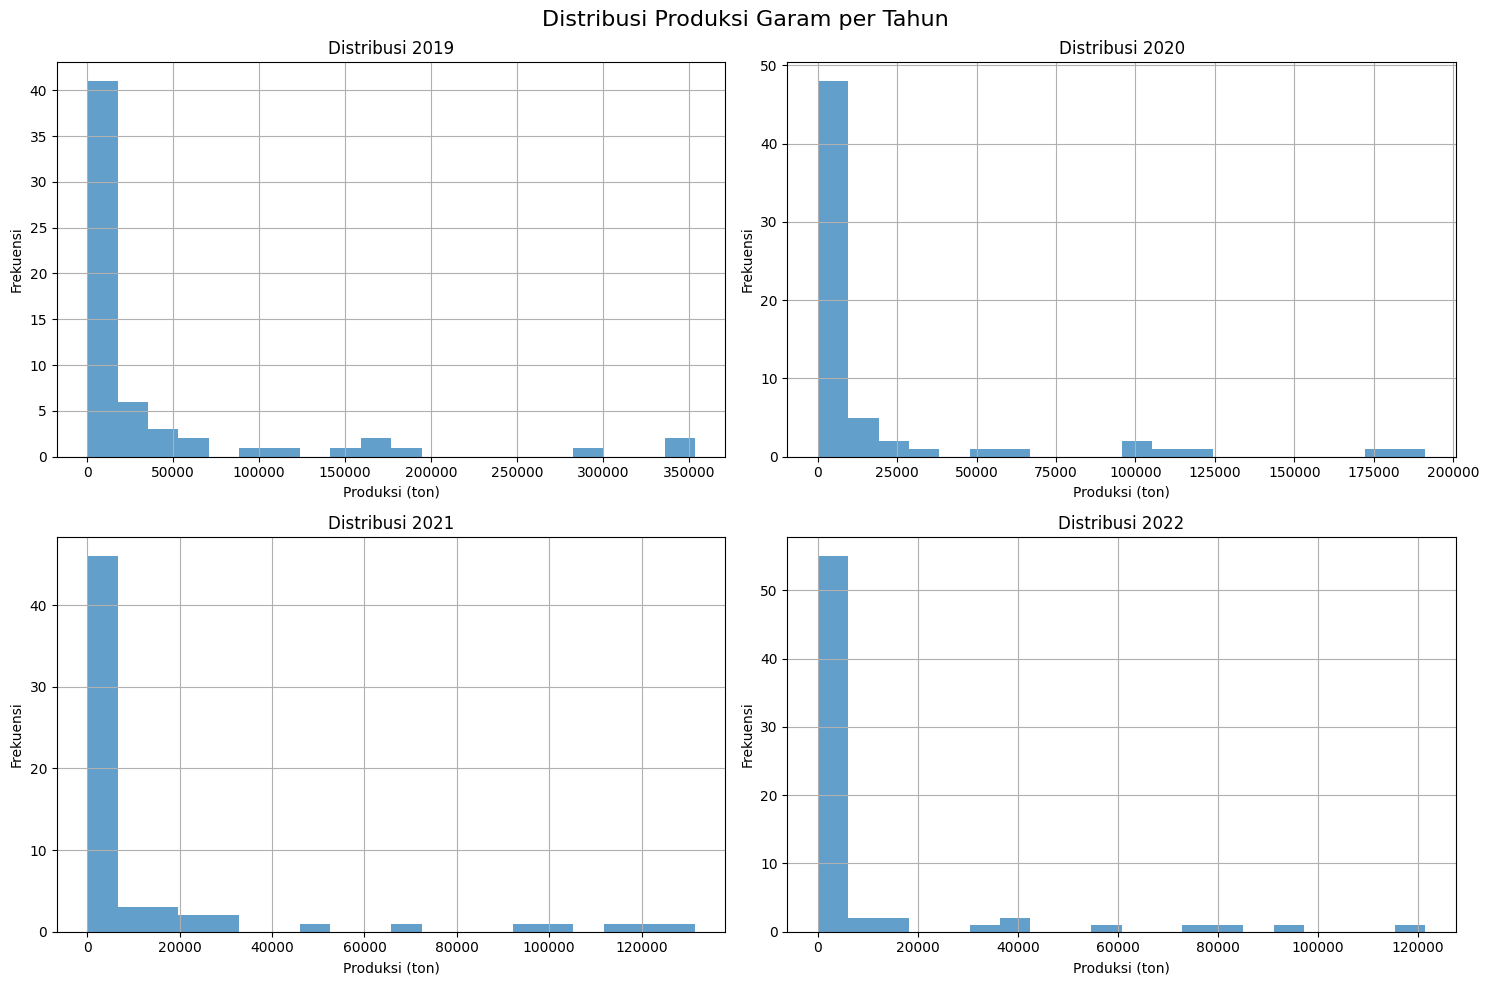

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribusi Produksi Garam per Tahun', fontsize=16)

for i, col in enumerate(tahun_cols[:4]):  # Tampilkan 4 tahun pertama (sesuai grid 2x2)
    ax = axes[i//2, i%2]
    df[col].hist(bins=20, ax=ax, alpha=0.7)
    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel('Produksi (ton)')
    ax.set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### **Heatmap korelasi antar tahun**

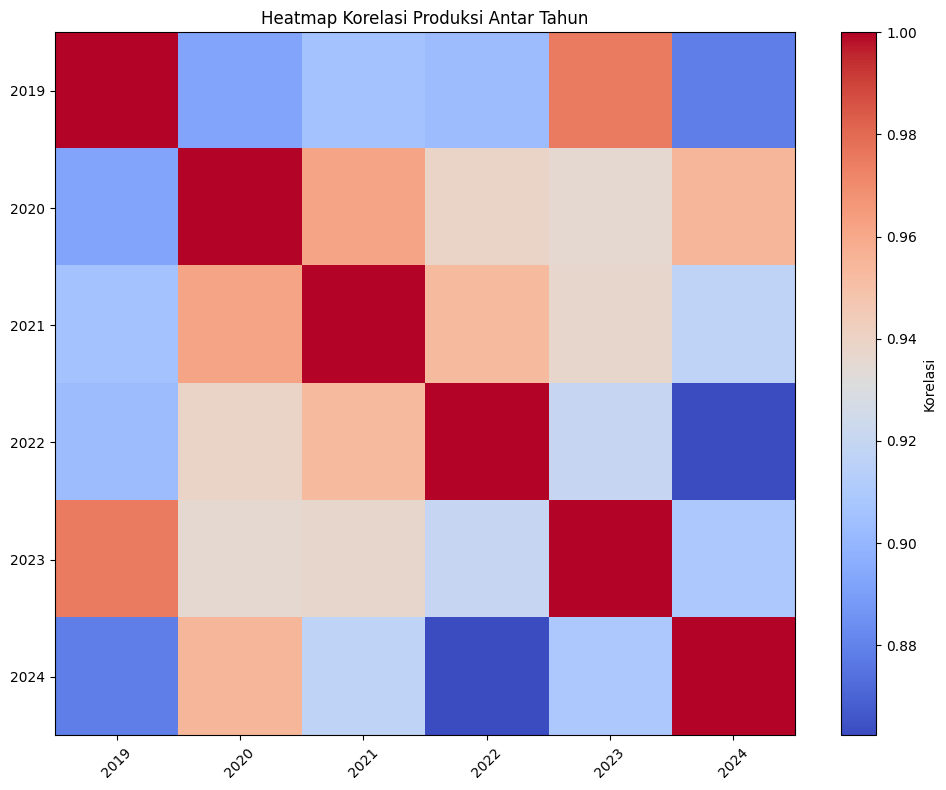

In [51]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[tahun_cols].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Korelasi')
plt.title('Heatmap Korelasi Produksi Antar Tahun')
plt.xticks(range(len(tahun_cols)), tahun_cols, rotation=45)
plt.yticks(range(len(tahun_cols)), tahun_cols)
plt.tight_layout()
plt.show()

### **Trend Produksi Garam Nasional**

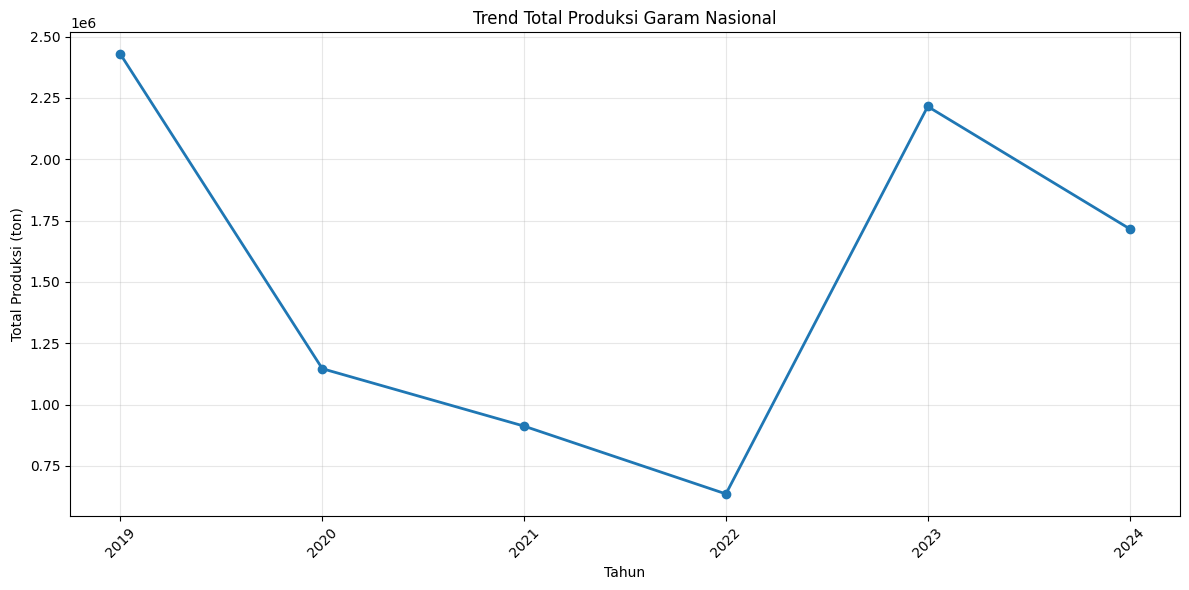

In [52]:
plt.figure(figsize=(12, 6))
total_produksi_per_tahun = df[tahun_cols].sum()
plt.plot(tahun_cols, total_produksi_per_tahun, marker='o', linewidth=2)
plt.title('Trend Total Produksi Garam Nasional')
plt.xlabel('Tahun')
plt.ylabel('Total Produksi (ton)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Data Cleaning**

In [53]:
# Implementasi cleaning
tahun_columns = [col for col in df.columns if col != 'KABKOTA']
mask = (~df[tahun_columns].isna().any(axis=1)) & (~(df[tahun_columns] == 0).any(axis=1))
df_clean = df[mask].copy()

In [54]:
# Informasi hasil cleaning
kabupaten_di_drop = set(df['KABKOTA']) - set(df_clean['KABKOTA'])
total_awal = len(df)
total_akhir = len(df_clean)

In [55]:
print(df_clean.shape)

(55, 7)


In [56]:
df_clean.to_excel("data_produksi_garam_clean.xlsx", index=False)

## **MODELING**

In [57]:
# Siapkan data untuk clustering (hanya kolom tahun)
tahun_columns = [col for col in df_clean.columns if col != 'KABKOTA']
X = df_clean[tahun_columns].values
kabupaten_names = df_clean['KABKOTA'].values

print(f"Fitur yang digunakan: {tahun_columns}")
print(f"Jumlah data untuk clustering: {len(X)} kabupaten")

Fitur yang digunakan: [2019, 2020, 2021, 2022, 2023, 2024]
Jumlah data untuk clustering: 55 kabupaten


#### **Standardisasi data**

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data telah distandardisasi untuk clustering")
print(f"Mean setelah scaling: {X_scaled.mean(axis=0).round(3)}")
print(f"Std setelah scaling: {X_scaled.std(axis=0).round(3)}")

Data telah distandardisasi untuk clustering
Mean setelah scaling: [-0.  0. -0. -0.  0. -0.]
Std setelah scaling: [1. 1. 1. 1. 1. 1.]


In [60]:
# Implementasi K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Tambahkan hasil clustering ke dataframe
df_clustered = df_clean.copy()
df_clustered['Cluster'] = cluster_labels

print(f"Clustering selesai dengan 3 cluster")
print(f"Distribusi cluster: {np.bincount(cluster_labels)}")

Clustering selesai dengan 3 cluster
Distribusi cluster: [48  3  4]


In [61]:
# Analisis cluster berdasarkan rata-rata produksi
print("\n=== ANALISIS KARAKTERISTIK CLUSTER ===")

# Hitung rata-rata produksi per kabupaten
df_clustered['Rata_rata_Produksi'] = df_clustered[tahun_columns].mean(axis=1)

# Analisis per cluster
cluster_analysis = df_clustered.groupby('Cluster').agg({
    'Rata_rata_Produksi': ['count', 'mean', 'min', 'max', 'std']
}).round(2)

print(cluster_analysis)

# Tentukan label cluster berdasarkan rata-rata produksi
cluster_means = df_clustered.groupby('Cluster')['Rata_rata_Produksi'].mean().sort_values()
cluster_mapping = {
    cluster_means.index[0]: 'Rendah',
    cluster_means.index[1]: 'Sedang',
    cluster_means.index[2]: 'Tinggi'
}

# Terapkan mapping
df_clustered['Kategori_Produksi'] = df_clustered['Cluster'].map(cluster_mapping)

print(f"\nMapping Cluster:")
for cluster, kategori in cluster_mapping.items():
    count = (df_clustered['Cluster'] == cluster).sum()
    mean_prod = df_clustered[df_clustered['Cluster'] == cluster]['Rata_rata_Produksi'].mean()
    print(f"Cluster {cluster} = {kategori}: {count} kabupaten, rata-rata {mean_prod:.1f} ton")


=== ANALISIS KARAKTERISTIK CLUSTER ===
        Rata_rata_Produksi                                           
                     count       mean        min        max       std
Cluster                                                              
0                       48    7630.38       8.62   58192.05  13297.65
1                        3  199689.07  178753.30  223510.78  22517.87
2                        4  124178.68   86552.89  161596.11  31021.93

Mapping Cluster:
Cluster 0 = Rendah: 48 kabupaten, rata-rata 7630.4 ton
Cluster 2 = Sedang: 4 kabupaten, rata-rata 124178.7 ton
Cluster 1 = Tinggi: 3 kabupaten, rata-rata 199689.1 ton


In [ ]:
# Tampilkan detail per kategori
for kategori in ['Tinggi', 'Sedang', 'Rendah']:
    kabupaten_kategori = df_clustered[df_clustered['Kategori_Produksi'] == kategori]
    print(f"\n{kategori.upper()} ({len(kabupaten_kategori)} kabupaten):")
    top_kabupaten = kabupaten_kategori.nlargest(5, 'Rata_rata_Produksi')[['KABKOTA', 'Rata_rata_Produksi']]
    for idx, row in top_kabupaten.iterrows():
        print(f"  - {row['KABKOTA']}: {row['Rata_rata_Produksi']:.1f} ton")


=== DETAIL KABUPATEN PER KATEGORI ===

TINGGI (3 kabupaten):
  - PATI: 223510.8 ton
  - SAMPANG: 196803.1 ton
  - SUMENEP: 178753.3 ton

SEDANG (4 kabupaten):
  - INDRAMAYU: 161596.1 ton
  - REMBANG: 130253.4 ton
  - BIMA: 118312.3 ton
  - PAMEKASAN: 86552.9 ton

RENDAH (48 kabupaten):
  - DEMAK: 58192.1 ton
  - CIREBON: 55634.1 ton
  - JEPARA: 35461.2 ton
  - JENEPONTO: 34342.9 ton
  - TUBAN: 21903.9 ton


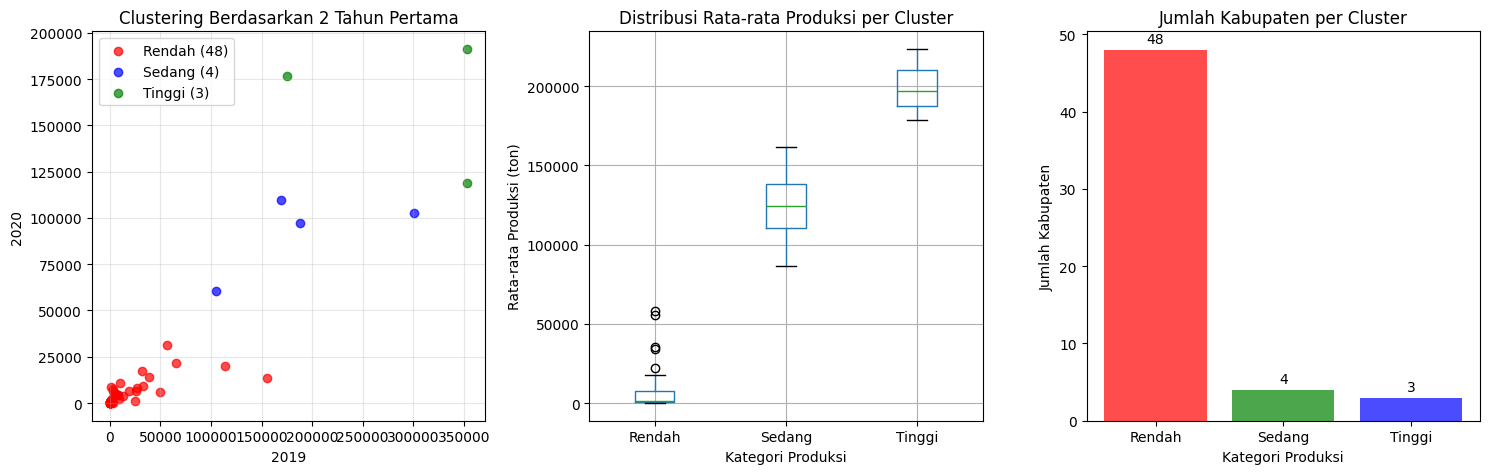

In [63]:
# Visualisasi hasil clustering

# 1. Scatter plot 2D (menggunakan 2 tahun pertama)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green']
for i, kategori in enumerate(['Rendah', 'Sedang', 'Tinggi']):
    cluster_data = df_clustered[df_clustered['Kategori_Produksi'] == kategori]
    plt.scatter(cluster_data[tahun_columns[0]], cluster_data[tahun_columns[1]],
               c=colors[i], label=f'{kategori} ({len(cluster_data)})', alpha=0.7)

plt.xlabel(tahun_columns[0])
plt.ylabel(tahun_columns[1])
plt.title('Clustering Berdasarkan 2 Tahun Pertama')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Box plot rata-rata produksi per cluster
plt.subplot(1, 3, 2)
df_clustered.boxplot(column='Rata_rata_Produksi', by='Kategori_Produksi', ax=plt.gca())
plt.title('Distribusi Rata-rata Produksi per Cluster')
plt.suptitle('')
plt.xlabel('Kategori Produksi')
plt.ylabel('Rata-rata Produksi (ton)')

# 3. Bar chart jumlah kabupaten per cluster
plt.subplot(1, 3, 3)
cluster_counts = df_clustered['Kategori_Produksi'].value_counts()
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=['red', 'green', 'blue'], alpha=0.7)
plt.title('Jumlah Kabupaten per Cluster')
plt.xlabel('Kategori Produksi')
plt.ylabel('Jumlah Kabupaten')

# Tambahkan label pada bar
for bar, count in zip(bars, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [65]:
# Simpan hasil clustering ke Excel

# Siapkan dataframe untuk export
df_export = df_clustered[['KABKOTA'] + tahun_columns + ['Cluster', 'Kategori_Produksi', 'Rata_rata_Produksi']].copy()

# Urutkan berdasarkan kategori dan rata-rata produksi
df_export = df_export.sort_values(['Kategori_Produksi', 'Rata_rata_Produksi'], ascending=[True, False])

# Simpan ke Excel
df_export.to_excel("hasil_clustering_garam.xlsx", index=False)

print("Hasil clustering telah disimpan ke 'hasil_clustering_garam.xlsx'")
print(f"\nRingkasan hasil:")
print(f"- Total kabupaten yang dicluster: {len(df_export)}")
print(f"- Produksi Tinggi: {len(df_export[df_export['Kategori_Produksi']=='Tinggi'])} kabupaten")
print(f"- Produksi Sedang: {len(df_export[df_export['Kategori_Produksi']=='Sedang'])} kabupaten")
print(f"- Produksi Rendah: {len(df_export[df_export['Kategori_Produksi']=='Rendah'])} kabupaten")

Hasil clustering telah disimpan ke 'hasil_clustering_garam.xlsx'

Ringkasan hasil:
- Total kabupaten yang dicluster: 55
- Produksi Tinggi: 3 kabupaten
- Produksi Sedang: 4 kabupaten
- Produksi Rendah: 48 kabupaten
